<a href="https://colab.research.google.com/github/TheIshaanTiwari/sem/blob/main/hypothesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hypothesis
The progression and severity of Alzheimer's disease (AD) are associated with a disproportionate loss of neuron subtypes crucial for learning and memory, particularly in the hippocampus. This selective vulnerability leads to a decreased proportion of these neuron subtypes relative to other neuronal populations. The rate of decline in these specific neuron subtypes correlates with the onset and severity of cognitive symptoms in AD patients.

In [2]:
!conda create -n scanpy_env python=3.8 scanpy numpy scipy matplotlib pandas
!conda activate scanpy_env

/bin/bash: line 1: conda: command not found
/bin/bash: line 1: conda: command not found


In [6]:
pip install numpy pandas matplotlib scanpy

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.0/129.0 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 5.7 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=4fcd8346bf03bdafea1c17a66fab8dcfd4cd76d967abbc44633d463ed03b7bab
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info


In [20]:
!pip install igraph
!pip install leidenalg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.0 MB/s eta 0:00:00


In [7]:
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
import urllib
urllib.request.urlretrieve('https://datasets.cellxgene.cziscience.com/5d871206-9489-4d9f-8106-94305ccb1c3a.h5ad', 'dataset.h5ad')

('dataset.h5ad', <http.client.HTTPMessage at 0x7afe3eff9420>)

In [12]:
adata = sc.read_h5ad("dataset.h5ad")

print(adata)

AnnData object with n_obs × n_vars = 23197 × 33091
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'SORT', 'Amyloid', 'Age', 'RIN', 'nCount_SCT', 'nFeature_SCT', 'nCount_Exon', 'nFeature_Exon', 'PMI', 'Braak', 'Sample.ID', 'Cell.Types', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'donor_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'citation', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_pca', 'X_umap'


###Preprocess Data

In [13]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

#Braak and Amyloid stage by disease control

##Braak
Braak staging is a scale that describes the extent of neurofibrillary tangle pathology in Alzheimer’s disease (AD), specifically related to tau protein accumulation. It ranges from stages
* I to VI, where:
* I-II: Pathology limited to the transentorhinal region.
* III-IV: Pathology extends to the limbic system (hippocampus and surrounding areas).
* V-VI: Widespread pathology across the neocortex.

##Amyloid
Amyloid is another key pathological feature of Alzheimer’s disease, in addition to tau neurofibrillary tangles. The presence of amyloid plaques is often measured and recorded to assess the overall pathology burden.

Braak stage distribution by disease condition:
Braak                     0         I        II   VI
disease                                             
Alzheimer disease  0.000000  0.000000  0.000000  1.0
normal             0.182223  0.348569  0.469208  0.0


<ipython-input-54-4c9a406a205b>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  braak_disease_distribution = adata.obs.groupby('disease')['Braak'].value_counts(normalize=True).unstack()


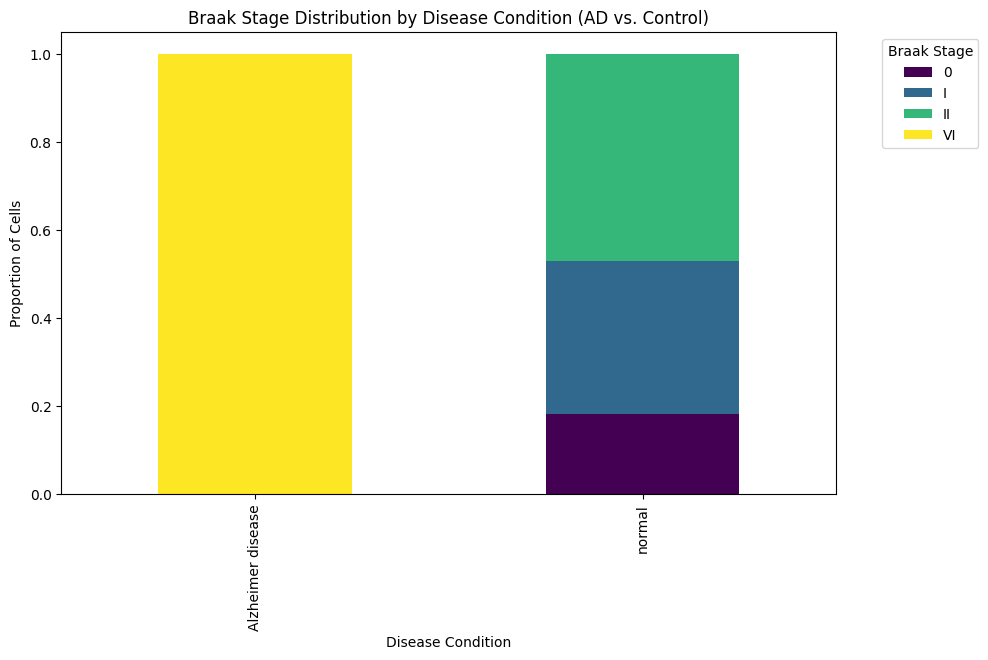

<ipython-input-54-4c9a406a205b>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  amyloid_disease_distribution = adata.obs.groupby('disease')['Amyloid'].value_counts(normalize=True).unstack()


Amyloid distribution by disease condition:
Amyloid             C3   DP (C0)        No
disease                                   
Alzheimer disease  1.0  0.000000  0.000000
normal             0.0  0.081472  0.918528


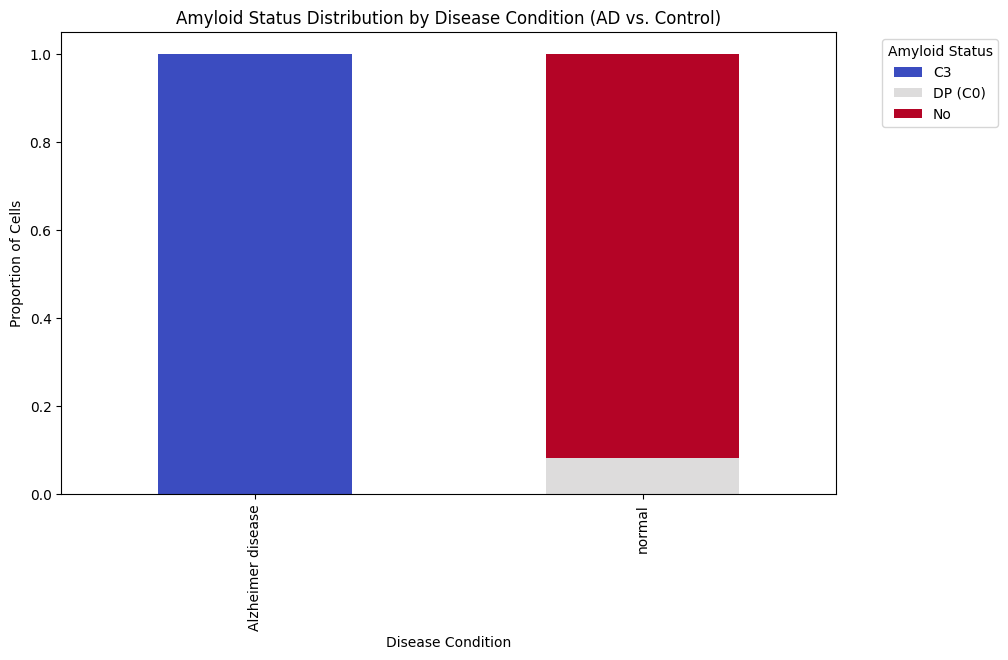

In [54]:
print("Braak stage distribution by disease condition:")
braak_disease_distribution = adata.obs.groupby('disease')['Braak'].value_counts(normalize=True).unstack()
print(braak_disease_distribution)
braak_disease_distribution.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))
plt.title("Braak Stage Distribution by Disease Condition (AD vs. Control)")
plt.xlabel("Disease Condition")
plt.ylabel("Proportion of Cells")
plt.legend(title="Braak Stage", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

amyloid_disease_distribution = adata.obs.groupby('disease')['Amyloid'].value_counts(normalize=True).unstack()
print("Amyloid distribution by disease condition:")
print(amyloid_disease_distribution)
amyloid_disease_distribution.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(10, 6))
plt.title("Amyloid Status Distribution by Disease Condition (AD vs. Control)")
plt.xlabel("Disease Condition")
plt.ylabel("Proportion of Cells")
plt.legend(title="Amyloid Status", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Alzheimer by ethnicity

                            Total_Count  AD_Count  AD_Percentage
self_reported_ethnicity                                         
European                           3996         0       0.000000
Hispanic or Latin American         1254         0       0.000000
African American                   2378      1418      59.629941
unknown                           15569     10315      66.253452


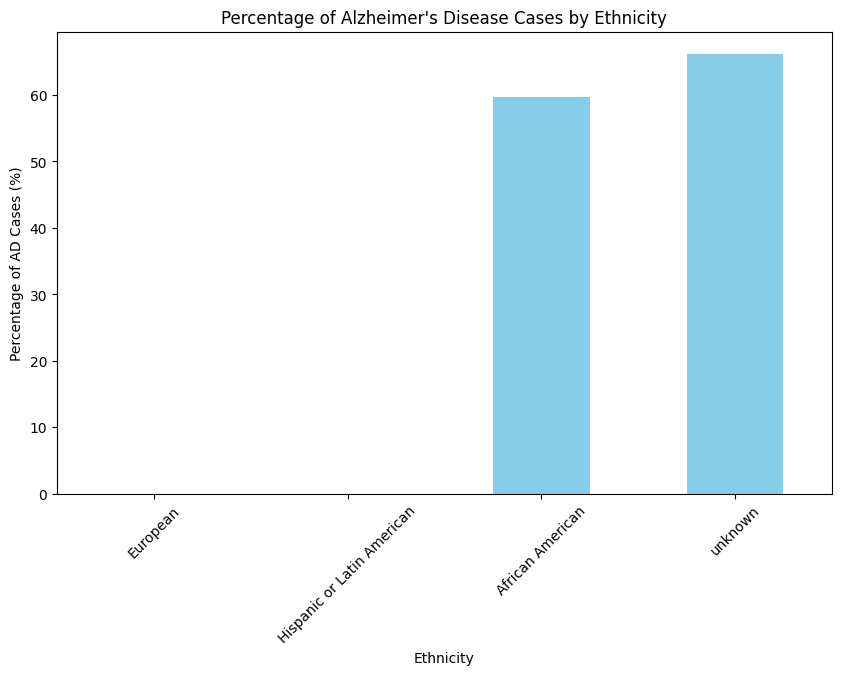

In [60]:
total_ethnicity_counts = adata.obs['self_reported_ethnicity'].value_counts()
ad_ethnicity_counts = adata.obs[adata.obs['disease'] == 'Alzheimer disease']['self_reported_ethnicity'].value_counts()
ethnicity_summary = pd.DataFrame({
    'Total_Count': total_ethnicity_counts,
    'AD_Count': ad_ethnicity_counts
}).fillna(0)
ethnicity_summary['AD_Percentage'] = (ethnicity_summary['AD_Count'] / ethnicity_summary['Total_Count']) * 100
print(ethnicity_summary)

ethnicity_summary['AD_Percentage'].plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Percentage of Alzheimer\'s Disease Cases by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Percentage of AD Cases (%)')
plt.xticks(rotation=45)
plt.show()

Conclusion: Europeans and Latin Americans are not open about revealing that they have AD, whereas African Americans are.


###Cluster Cells and Identify Cell Types




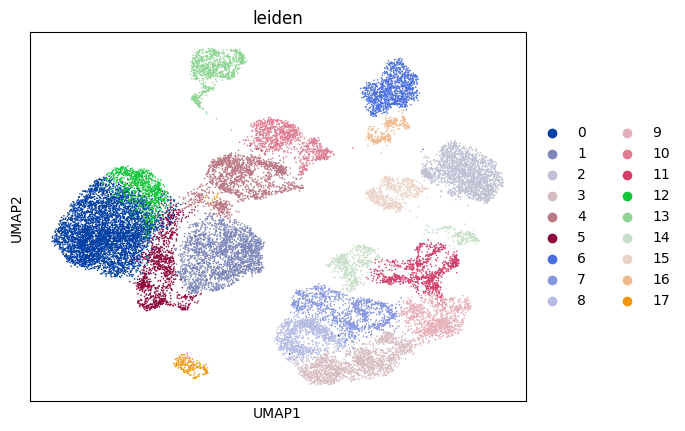

In [29]:
sc.pp.pca(adata)
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.leiden(adata, resolution=0.5)
sc.tl.umap(adata)
sc.pl.umap(adata, color=['leiden'])

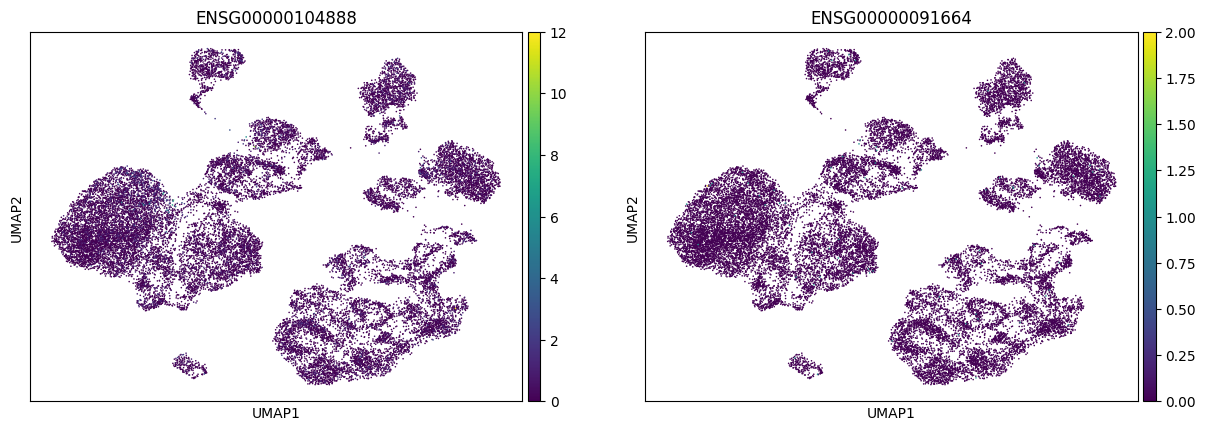

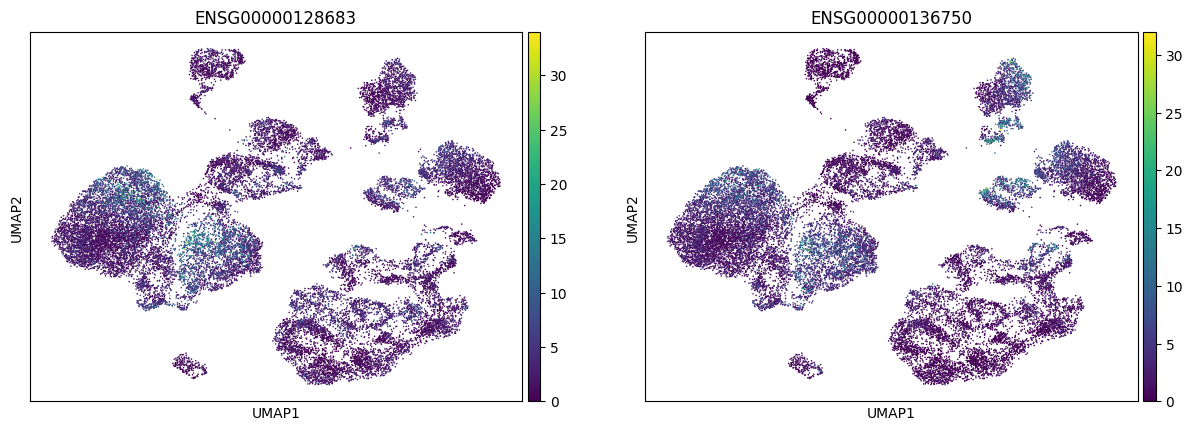

In [32]:
marker_genes = {
    'Excitatory': ['ENSG00000104888', 'ENSG00000091664'], # SLC17A7, SLC17A6
    'Inhibitory': ['ENSG00000128683', 'ENSG00000136750'], # GAD1, GAD2
}

sc.pl.umap(adata, color=list(marker_genes['Excitatory']))
sc.pl.umap(adata, color=list(marker_genes['Inhibitory']))

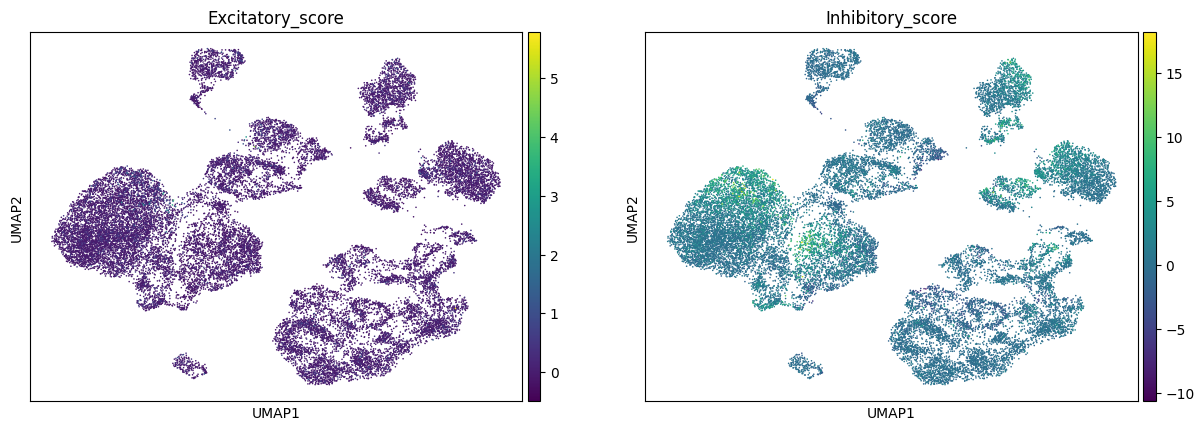

In [33]:
for subtype, markers in marker_genes.items():
    sc.tl.score_genes(adata, markers, score_name=f'{subtype}_score')
sc.pl.umap(adata, color=[f'{subtype}_score' for subtype in marker_genes.keys()])

#Proportions of Neuron Subtypes in AD vs. Control

                            Control        AD
Cell.Types                                   
In1_LHX6-PVALB             0.401605  0.392398
In2_LHX6-PVALB-Chandelier  0.027565  0.046450
In3_LHX6-SST               0.131106  0.091366
In4_LHX6-SST-NPY           0.009682  0.007074
In5_LHX6-ADARB2-LAMP5      0.059839  0.062047
In6_ADARB2-LAMP5           0.112352  0.103298
In7_ADARB2-CALB2           0.257851  0.297366


<Axes: title={'center': 'Neuron Subtype Proportions in AD vs Control'}, xlabel='Cell.Types'>

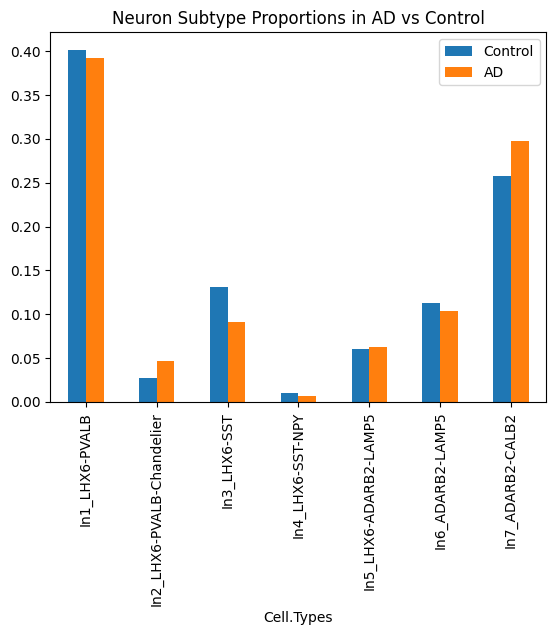

In [37]:
control_cells = adata[adata.obs['disease'] == 'normal']
ad_cells = adata[adata.obs['disease'] == 'Alzheimer disease']

control_proportions = control_cells.obs['Cell.Types'].value_counts(normalize=True)
ad_proportions = ad_cells.obs['Cell.Types'].value_counts(normalize=True)

proportions_df = pd.DataFrame({
    'Control': control_proportions,
    'AD': ad_proportions
}).fillna(0)

print(proportions_df)

proportions_df.plot(kind='bar', title='Neuron Subtype Proportions in AD vs Control')